In [1]:
file = r"data/data.csv"

In [2]:
import numpy as np
from math import *
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def drow_plot(x, y, clf):
    h = .02  # step size in the mesh

    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Blues)


    # plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(x[pos, 0], x[pos, 1],cmap=plt.cm.Blues, edgecolors='k')
    plt.scatter(x[neg, 0], x[neg, 1], cmap=plt.cm.Blues_r, edgecolors='k')

    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Not Admitted', 'Admitted'])
    plt.show()

In [6]:
def plot_data(x, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.scatter(x[pos, 0], x[pos, 1],cmap=plt.cm.Paired, edgecolors='k')
    plt.scatter(x[neg, 0], x[neg, 1], cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Not Admitted', 'Admitted'])
    plt.grid()
    plt.show()

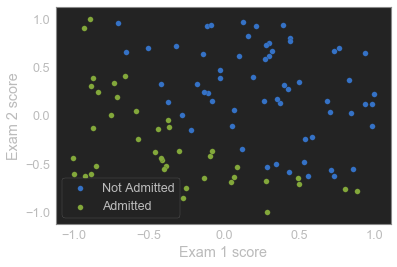

In [7]:
plot_data(X, Y)

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

df = pd.read_csv(file,header = 0)
df.columns = ["grade1","grade2","label"]
x = df["label"].map(lambda x: float(x.rstrip(';')))

# formats the input data into two arrays, one of independant variables
# and one of the dependant variable
X = df[["grade1","grade2"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["label"].map(lambda x: float(x.rstrip(';')))
Y = np.array(Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [9]:
class LogisticRegression:
    
    initial_theta = [0, 0]
     
    def __init__(self, alpha = 0.1, iteration = 1000):
        self.alpha = alpha
        self.iteration = iteration
    
    def cost_function(self, x, y, theta, m):
        sum_of_error = 0
        for i in range(m):

            xi = x[i]
            h = self.hypothesis(xi, theta)
            if y[i] == 1:
                error = y[i] * np.log(h)
            elif y[i] == 0:
                error = (1 - y[i]) * np.log(1 - h)
            sum_of_error += error
        cons = -1 / float(m)
        j = cons * sum_of_error
        print('Cost Is : ', j)
        return j
    
    def predict(self, X):
        theta = np.asarray(self.initial_theta)
        X = np.asarray(X).T
        z = theta.T.dot(X)
        h = 1 / (1 + np.exp(-z))
        result = []
        for i in h:
            if i >= 0.5:
                result.append(1)
            else:
                result.append(0)
        return np.array(result)
    
    def hypothesis(self, X, theta):
        theta = np.asarray(self.initial_theta)
        X = np.asarray(X).T
        z = theta.T.dot(X)
        h = 1 / (1 + np.exp(-z))
        return h
    
    def fit(self, x, y):
        m = len(y)
        alpha = self.alpha
        iteration = self.iteration
        theta = self.initial_theta
        lemda = 0.1
        
        for k in range(iteration):
            new_theta = []
            for j in range(len(theta)):                
                errorSum = 0
                for i in range(m):

                    xi = x[i]
                    xij = xi[j]
                    h = self.hypothesis(xi, theta)
                    errorSum += (h - y[i]) * xij + (lemda / m)  * theta[j]

                const = alpha / m
                j_theta = const * errorSum
                new_t = theta[j] - j_theta
                new_theta.append(new_t)
            theta = new_theta
            if k % 100 == 0:
                self.cost_function(x, y, theta , m)
            self.initial_theta = theta

In [10]:
reg = LogisticRegression()

In [11]:
reg.fit(X_train, Y_train)

Cost Is :  0.69314718056
Cost Is :  0.446952555243
Cost Is :  0.369070243533
Cost Is :  0.332334477377
Cost Is :  0.311055495703
Cost Is :  0.297221281294
Cost Is :  0.28754553729
Cost Is :  0.280429165886
Cost Is :  0.274999234015
Cost Is :  0.27073828282


In [12]:
from sklearn.metrics import accuracy_score

pred = reg.predict(X_test)

accuracy_score(pred, Y_test)

0.87878787878787878

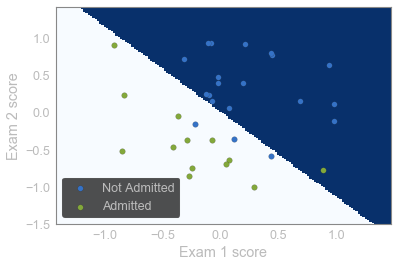

In [13]:
drow_plot(X_test, Y_test, reg)